In [173]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [242]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
from datetime import datetime
import numpy as np

## Data Acquisition

In [243]:
csv_files = glob.glob('ALL Fit to Excel/Excel_data/*.xlsx')
len(csv_files)

118

## Data Preprocessing

In [244]:
csv.head()

,date,time,distance(m),enhanced_speed(m/s),speed(m/s),heart_rate(bpm),position_lat,position_long,Id,hours,minutes
0,2019-01-04,07:54:01,0.18,2.682,2.682,74,33.659099,73.092028,G9,7,54
1,2019-01-04,07:54:02,0.18,2.174,2.174,75,33.659100,73.092028,G9,7,54
2,2019-01-04,07:54:10,1.26,0.573,0.573,78,33.659097,73.092039,G9,7,54
3,2019-01-04,07:54:11,1.63,0.550,0.550,81,33.659094,73.092041,G9,7,54
4,2019-01-04,07:54:15,3.10,0.475,0.475,84,33.659087,73.092056,G9,7,54


In [176]:
def distance_metric(x):
    return x.max()-x.min()

In [177]:
dataframe = pd.DataFrame()
for each_file in csv_files:
    csv=pd.read_excel(each_file)
    csv['Id']=each_file.split('_')[1].split('/')[1]
    csv['datetime']=pd.to_datetime(csv['date']+' '+csv['time'])
    csv['hours']=csv['datetime'].dt.hour
    csv['minutes']=csv['datetime'].dt.minute
    csv.drop('datetime', axis=1, inplace = True)
    dataframe = dataframe.append(csv, ignore_index=True)
    

/tmp/ipykernel_19787/1547723501.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(csv, ignore_index=True)
/tmp/ipykernel_19787/1547723501.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(csv, ignore_index=True)
/tmp/ipykernel_19787/1547723501.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(csv, ignore_index=True)
/tmp/ipykernel_19787/1547723501.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(csv, ignore_index=True)
/tmp/ipykernel_19787/1547723501.py:9: FutureWarning: The frame.append method is deprecated and w

In [178]:
dataframe

,date,time,distance(m),enhanced_speed(m/s),speed(m/s),heart_rate(bpm),position_lat,position_long,Id,hours,minutes
0,2018-12-04,7:52:09,0.13,2.682,2.682,74,33.647261,73.036907,G10,7,52
1,2018-12-04,7:52:10,0.13,2.168,2.168,74,33.647260,73.036908,G10,7,52
2,2018-12-04,7:52:46,7.37,0.258,0.258,78,33.647218,73.036931,G10,7,52
3,2018-12-04,7:52:56,9.62,0.306,0.306,75,33.647204,73.036931,G10,7,52
4,2018-12-04,7:53:02,9.99,0.290,0.290,78,33.647204,73.036931,G10,7,53
...,...,...,...,...,...,...,...,...,...,...,...
247566,2019-01-04,12:13:07,21080.87,0.947,0.947,93,33.647004,73.037660,G9,12,13
247567,2019-01-04,12:13:08,21081.01,0.924,0.924,92,33.647003,73.037659,G9,12,13
247568,2019-01-04,12:13:11,21081.44,0.883,0.883,89,33.647001,73.037655,G9,12,13
247569,2019-01-04,12:13:21,21083.31,0.777,0.777,92,33.647020,73.037642,G9,12,13


In [179]:
df = dataframe.groupby(['Id','date','hours','minutes']).agg({'distance(m)':distance_metric, 'enhanced_speed(m/s)': 'mean', 'speed(m/s)':'mean', 'heart_rate(bpm)':'mean'})

## Data Information and Plots

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 34173 entries, ('G1', '2018-12-04', 7, 20) to ('G9', '2019-01-04', 12, 13)
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   distance(m)          34173 non-null  float64
 1   enhanced_speed(m/s)  34173 non-null  float64
 2   speed(m/s)           34173 non-null  float64
 3   heart_rate(bpm)      34173 non-null  float64
dtypes: float64(4)
memory usage: 1.2+ MB


In [186]:
df.describe()

,distance(m),enhanced_speed(m/s),speed(m/s),heart_rate(bpm)
count,34173.000000,34173.000000,34173.000000,34173.000000
mean,32.695442,0.811689,0.811689,103.405341
std,72.316147,1.318214,1.318214,18.239026
min,0.000000,0.088000,0.088000,32.500000
25%,8.340000,0.391400,0.391400,91.000000
50%,16.350000,0.516000,0.516000,103.500000
75%,29.090000,0.745000,0.745000,115.000000
max,1118.690000,49.310800,49.310800,184.500000


<AxesSubplot:title={'center':'Heart Rates Plot for All '}, xlabel='Id,date,hours,minutes'>

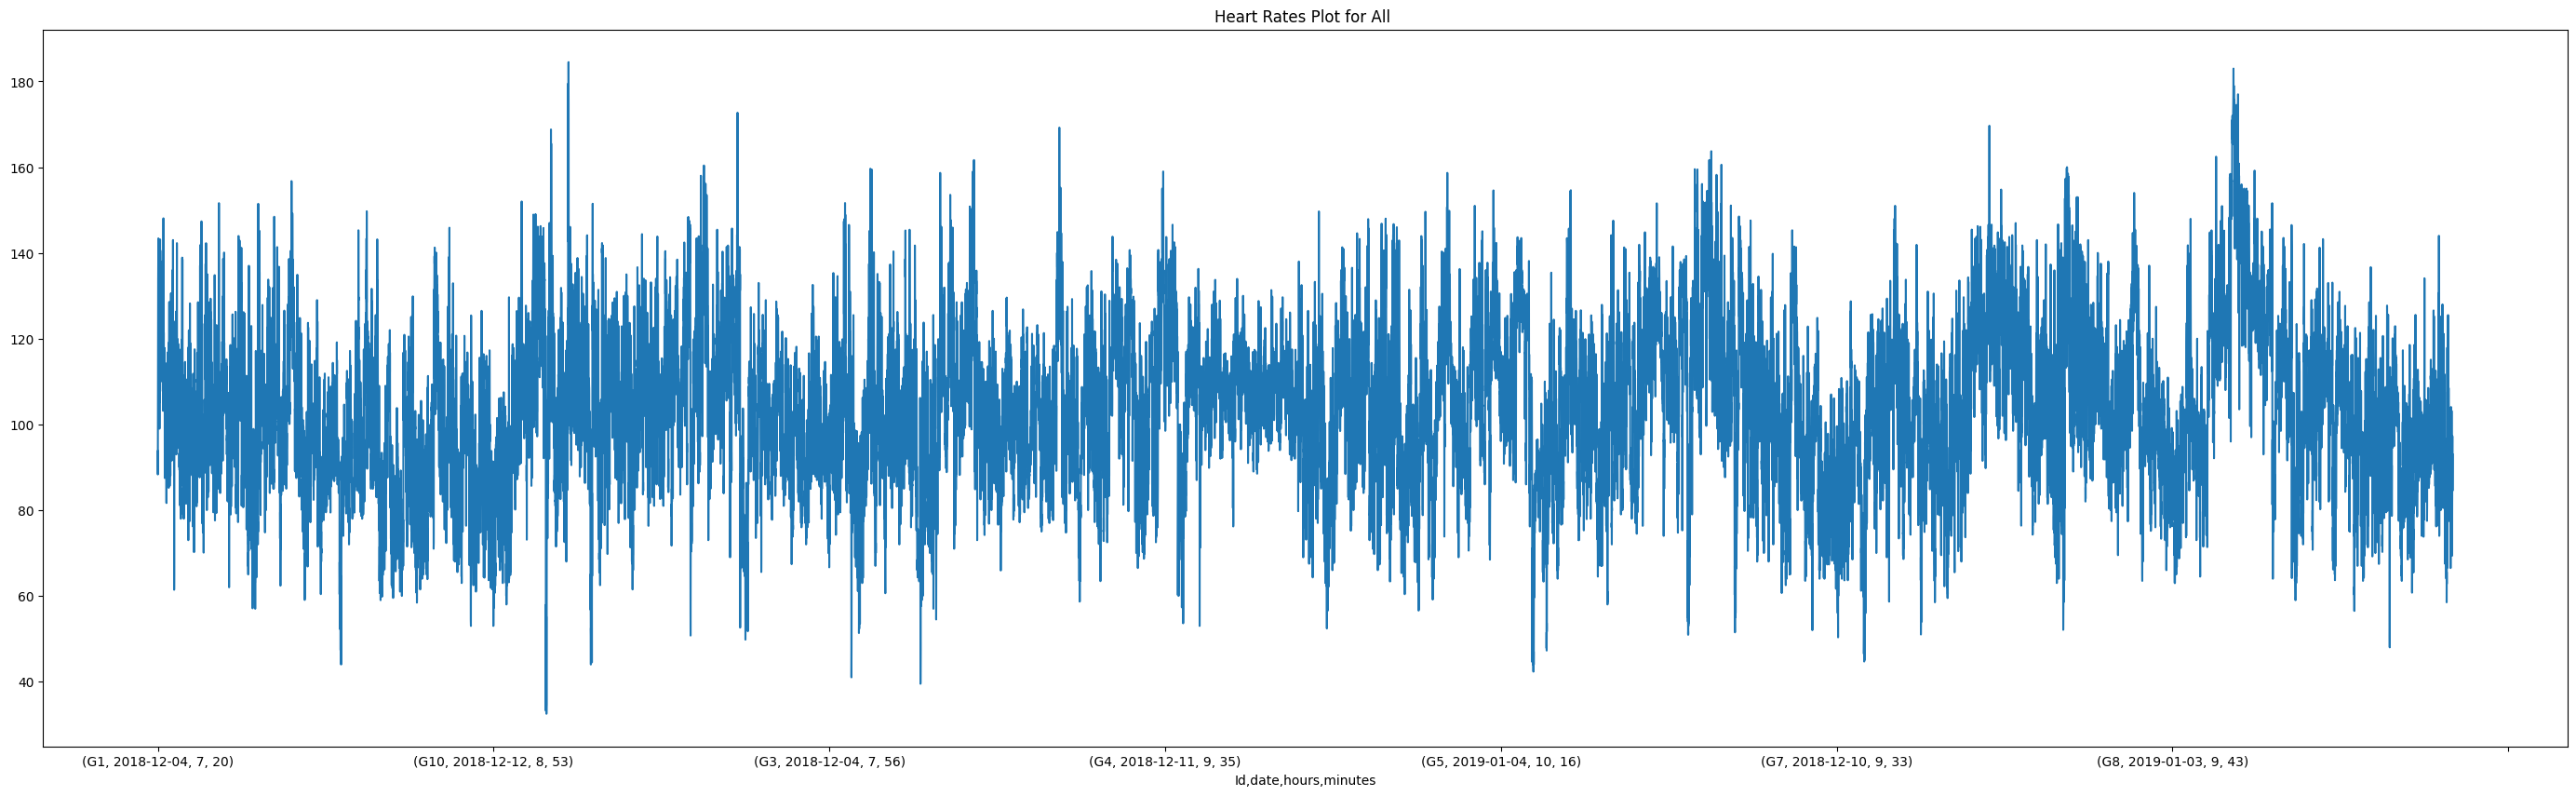

In [190]:
plt.figure(figsize=(35,10))
plt.title("Heart Rates Plot for All ")
df['heart_rate(bpm)'].plot()

<AxesSubplot:title={'center':'Heart Rate for G1'}, xlabel='date,hours,minutes'>

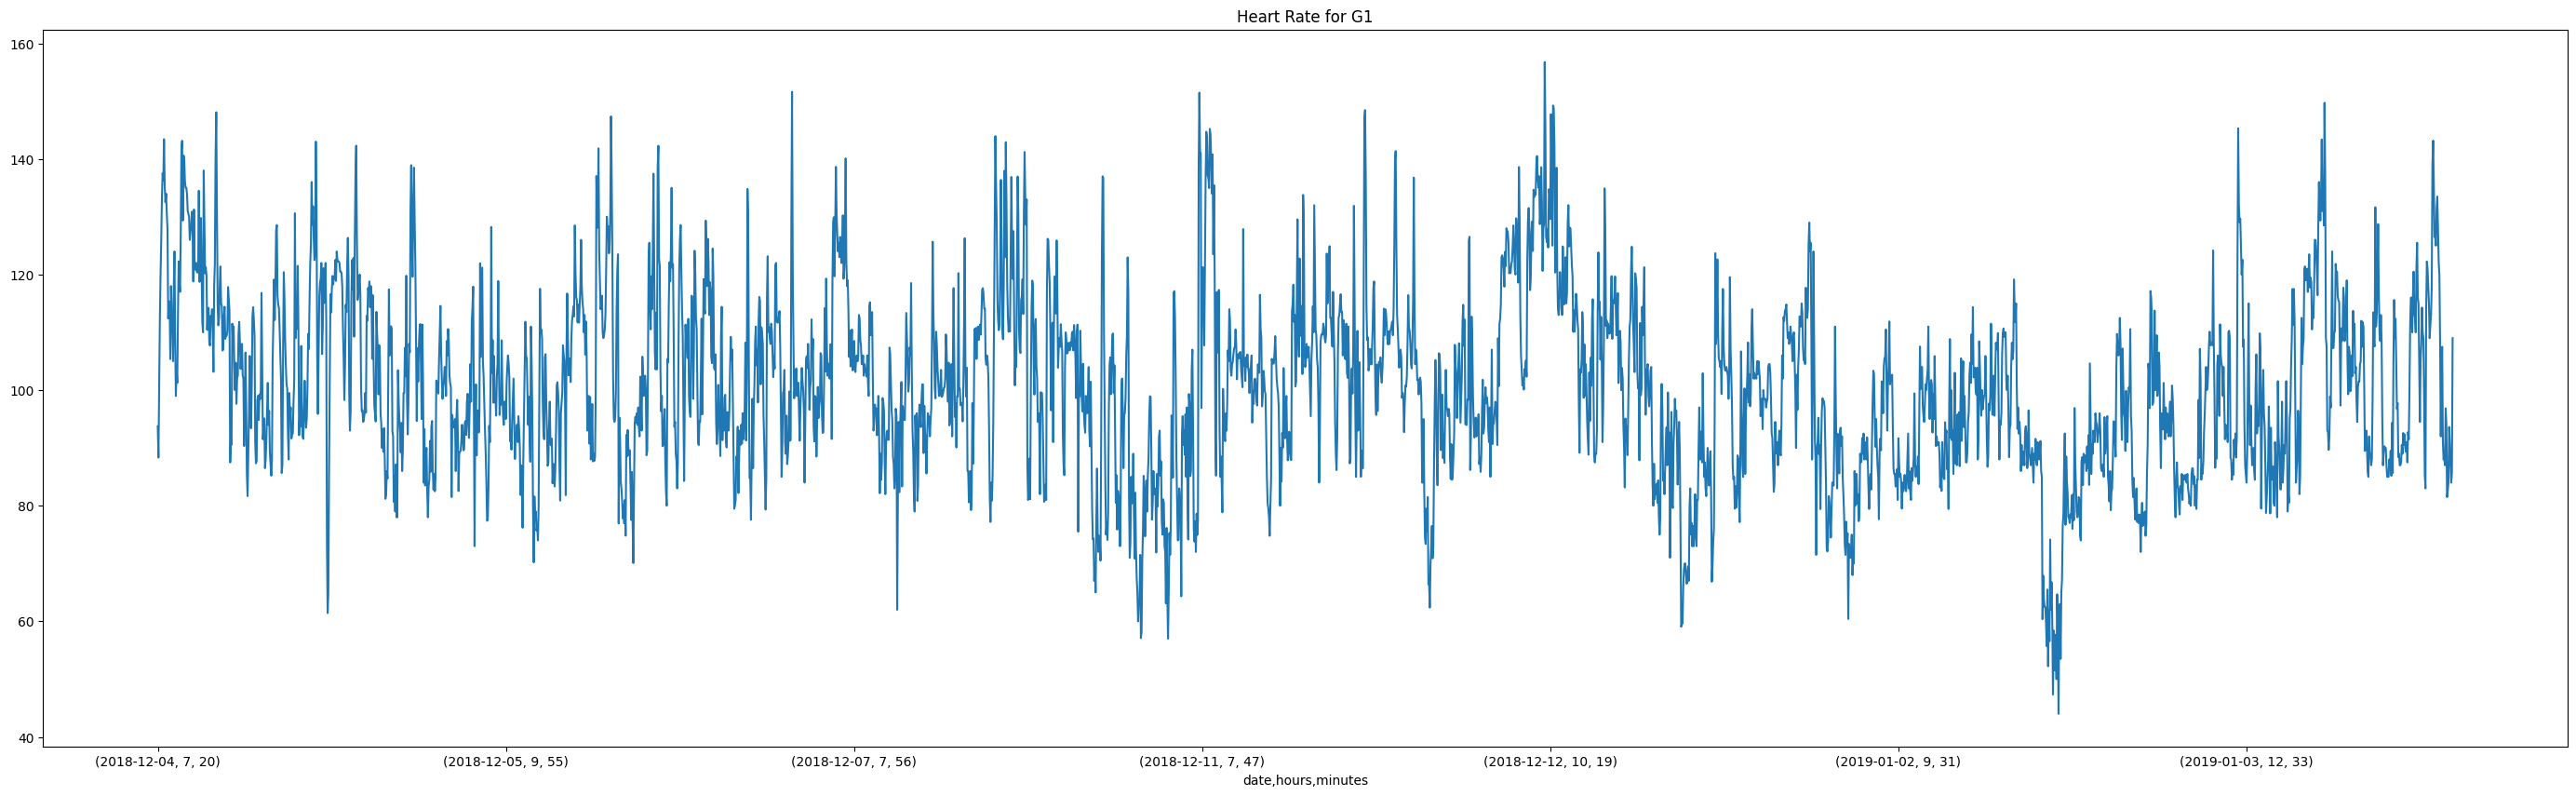

In [189]:
plt.figure(figsize=(35,10))
plt.title("Heart Rate for G1")
df.loc['G1']['heart_rate(bpm)'].plot()

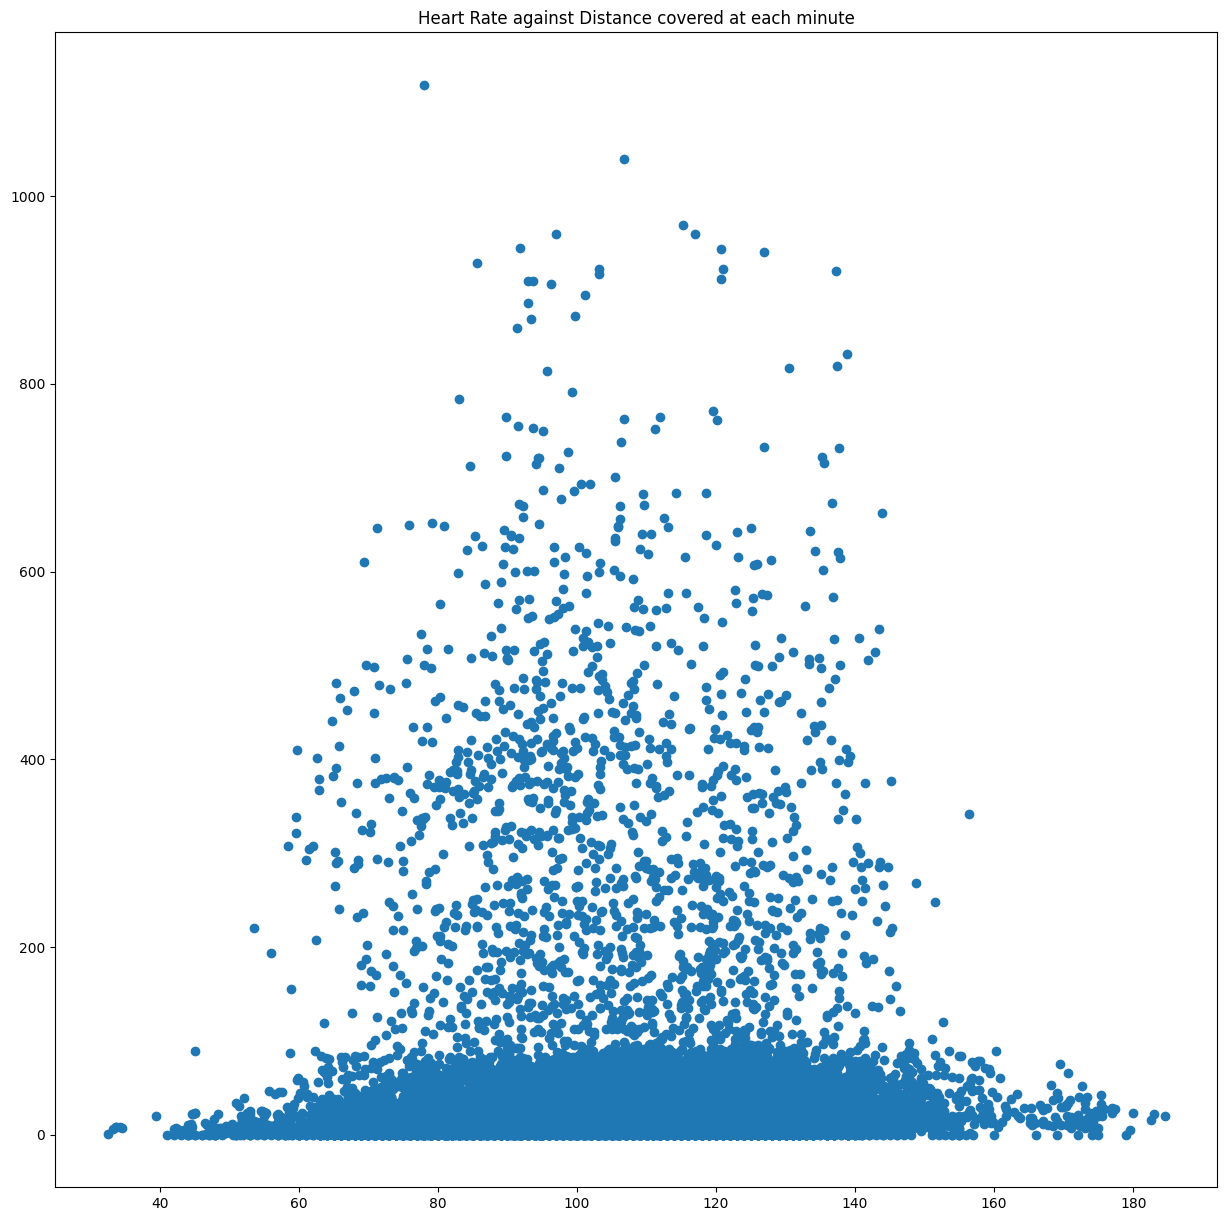

In [191]:
plt.figure(figsize = (15,15))
plt.title("Heart Rate against Distance covered at each minute")
plt.scatter(df['heart_rate(bpm)'], df['distance(m)'])

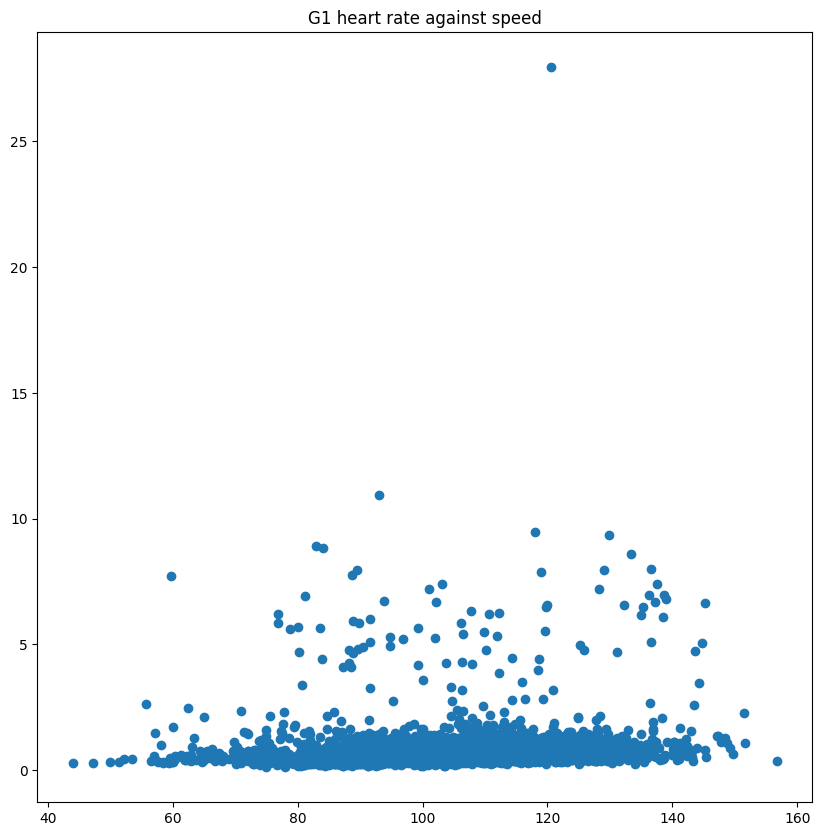

In [192]:
#Plot heart rate against speed for Id G1
plt.figure(figsize=(10,10))
plt.title("G1 heart rate against speed") 
plt.scatter(df.loc['G1']['heart_rate(bpm)'], df.loc['G1']['speed(m/s)'])

## Applying Thresholding only on Heart Rate

In [236]:
low_hr = df[df['heart_rate(bpm)']<60]
normal_hr = df[(df['heart_rate(bpm)']>60) & (df['heart_rate(bpm)']<110)]
high_hr = df[df['heart_rate(bpm)']>110]

<AxesSubplot:xlabel='Id,date,hours,minutes'>

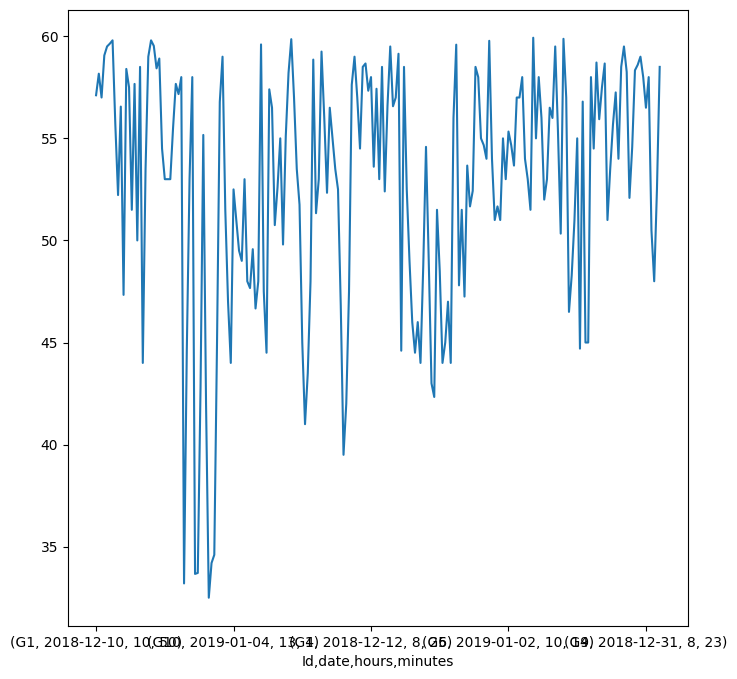

In [237]:
plt.figure(figsize=(8,8))
low_hr['heart_rate(bpm)'].plot()

<AxesSubplot:xlabel='Id,date,hours,minutes'>

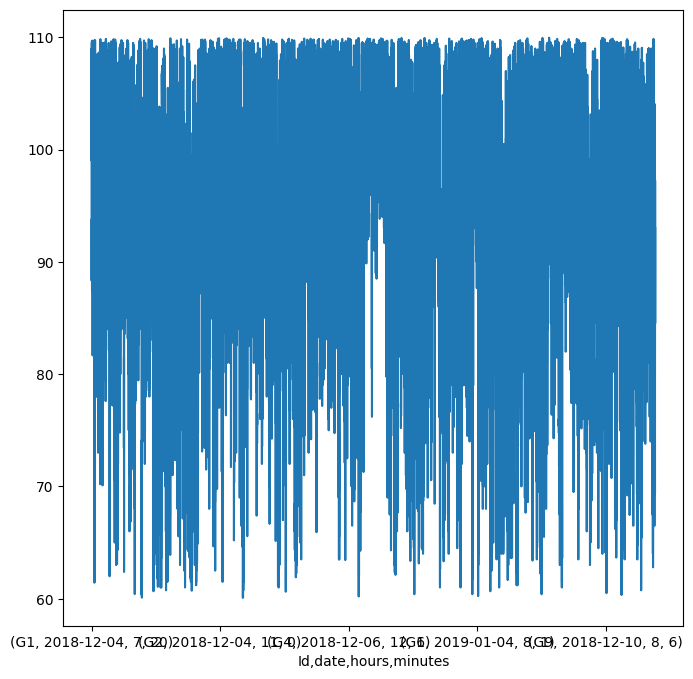

In [238]:
plt.figure(figsize=(8,8))
normal_hr['heart_rate(bpm)'].plot()

<AxesSubplot:xlabel='Id,date,hours,minutes'>

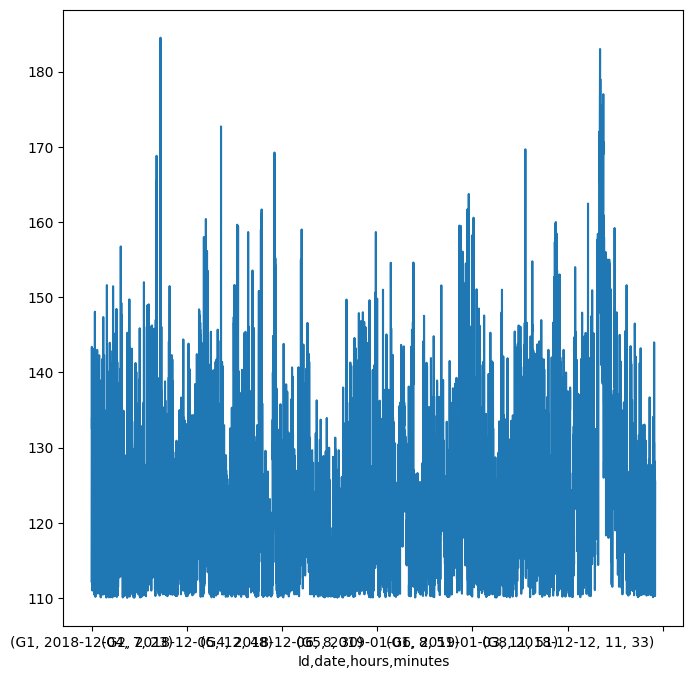

In [239]:
plt.figure(figsize=(8,8))
high_hr['heart_rate(bpm)'].plot()

In [252]:
df_thresolded = df.copy()
df_thresolded['Label'] = pd.cut(df['heart_rate(bpm)'], bins=[0,60,110,np.inf], labels=['0', '1', '2'])
df_thresolded.head()

distance(m)  enhanced_speed(m/s)  speed(m/s)  \
Id date       hours minutes                                                 
G1 2018-12-04 7     20              1.46             1.554000    1.554000   
                    21             10.21             0.276333    0.276333   
                    22             21.71             0.320059    0.320059   
                    23            312.85             3.868684    3.868684   
                    24            432.17             6.565650    6.565650   

                             heart_rate(bpm) Label  
Id date       hours minutes                         
G1 2018-12-04 7     20             93.750000     1  
                    21             88.333333     1  
                    22            100.882353     1  
                    23            112.210526     2  
                    24            119.850000     2

## Applying K Means to data

In [253]:
from sklearn.cluster import KMeans
kmeans = KMeans(3, random_state=54, n_init="auto").fit(df)

In [254]:
df

distance(m)  enhanced_speed(m/s)  speed(m/s)  \
Id date       hours minutes                                                 
G1 2018-12-04 7     20              1.46             1.554000    1.554000   
                    21             10.21             0.276333    0.276333   
                    22             21.71             0.320059    0.320059   
                    23            312.85             3.868684    3.868684   
                    24            432.17             6.565650    6.565650   
...                                  ...                  ...         ...   
G9 2019-01-04 12    9             484.10             8.555792    8.555792   
                    10            554.90             8.496778    8.496778   
                    11            439.30             6.781905    6.781905   
                    12            164.38             4.324095    4.324095   
                    13              3.36             0.914714    0.914714   

                             heart_rate(bpm)  
Id date       hours minutes                   
G1 2018-12-04 7     20             93.750000  
                    21             88.333333  
                    22            100.882353  
                    23            112.210526  
                    24            119.850000  
...                                      ...  
G9 2019-01-04 12    9              94.041667  
                    10             97.259259  
                    11             93.333333  
                    12             84.523810  
                    13             93.000000  

[34173 rows x 4 columns]

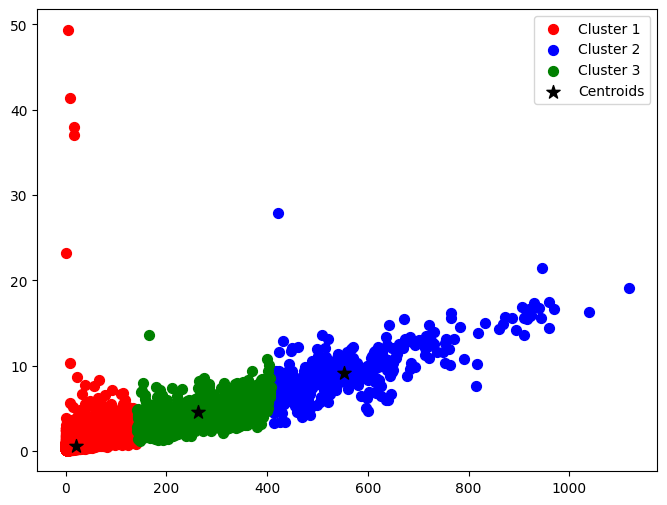

In [230]:
# Get the predicted labels and the centroids
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

# Plot the clusters and the centroids
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df.iloc[labels == 0, 0], df.iloc[labels == 0, 1], s=50, color='red', label='Cluster 1')
ax.scatter(df.iloc[labels == 1, 0], df.iloc[labels == 1, 1], s=50, color='blue', label='Cluster 2')
ax.scatter(df.iloc[labels == 2, 0], df.iloc[labels == 2, 1], s=50, color='green', label='Cluster 3')
ax.scatter(centroids[:, 0], centroids[:, 1], s=100, color='black', marker='*', label='Centroids')
ax.legend()
plt.show()

In [228]:
df.loc[('G1', '2018-12-04',  7, 20)]

distance(m)             1.460
enhanced_speed(m/s)     1.554
speed(m/s)              1.554
heart_rate(bpm)        93.750
Name: (G1, 2018-12-04, 7, 20), dtype: float64

## Applying Classification

In [285]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Classification Class
class Classification:
    #train test split
    def train_test_split(df):
        X_train, X_test, y_train, y_test = train_test_split(df.drop('Label', axis=1), df['Label'], test_size=0.2, random_state=42)
        return X_train, X_test, y_train, y_test

    #KNN Classifier
    def KNN(X_train, X_test, y_train, y_test, neighbors):
        knn = KNeighborsClassifier(n_neighbors=neighbors)
        knn.fit(X_train, y_train)
        knn_pred = knn.predict(X_test)
        return knn, accuracy_score(y_test, knn_pred)
    
    #Random Forest Classifier
    def RandomForest(X_train, X_test, y_train, y_test, estimators):
        rf = RandomForestClassifier(n_estimators=estimators, random_state=42)
        rf.fit(X_train, y_train)
        rf_pred = rf.predict(X_test)
        return rf, accuracy_score(y_test, rf_pred)
    
    #Decision Tree
    def DecisionTree(X_train, X_test, y_train, y_test, estimators):
        dt = DecisionTreeClassifier(random_state=42)
        dt.fit(X_train, y_train)
        dt_pred = dt.predict(X_test)
        return dt, accuracy_score(y_test, dt_pred)